In [1]:
%pip install pandas numpy nltk wordcloud matplotlib seaborn gensim scikit-learn plotly pycountry


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import warnings
from nltk.chunk import ne_chunk
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import word_tokenize, pos_tag, sent_tokenize
import plotly.express as px
import nltk
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
from nltk.chunk import ne_chunk
import re
import pycountry

warnings.filterwarnings("ignore")

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk

True

In [4]:
import pandas as pd

# Load the JSON file into a DataFrame
df = pd.read_json("C:/Users/User/Downloads/archive (5)/eurovision-lyrics-2024.json", orient="index")

# List of specified artists, random 40
artists = ["Maria Elena Kyriakou", "Ieva Zasimauskait\u0117", "Anri Jokhadze", "Ladaniva", "Alex Swings Oscar Sings!",
    "An\u017eej De\u017ean", "Anja", "Feminnem", "Amber", "Safura", "Da\u00f0i og Gagnamagni\u00f0", "Amanda Georgiadi Tenfjord",
    "Les Fatals Picards", "Margaret Berger", "Tereza Kerndlov\u00e1", "Michael Ben David", "Mimicat",
    "Ryan O'Shaughnessy", "Kraljevi Ulice & 75 Cents", "Arilena Ara", "Intars Busulis", "Greta Sal\u00f3me & J\u00f3nsi",
    "Sasha Son", "Engelbert Humperdinck", "Rosa Linn", "Senhit", "Sibel Tüzün", "Imri Ziv", "TIX",
    "Anti Social Media", "Max Jason Mai", "Eugent Bushpepa", "Hind", "Jurij Veklenko", "Omar Naber",
    "Oto Nemsadze", "Mandinga", "Alvan & Ahez", "Francesca Michielin", "Vincent Bueno"
     
]

# Filter the DataFrame to include only rows with the specified artists
filtered_df = df[df['Artist'].isin(artists)]

# Check the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:", filtered_df.shape)

# Check which artists from the list are in the filtered DataFrame
included_artists = filtered_df['Artist'].unique()
print("Artists included in the filtered DataFrame:", included_artists)

# Check which artists are missing
missing_artists = set(artists) - set(included_artists)
print("Artists missing from the filtered DataFrame:", missing_artists)

# If the filtered DataFrame has less than 40 rows, duplicate rows to reach 40
if len(filtered_df) < 40:
    # Calculate how many times to repeat the DataFrame
    repeat_times = (40 // len(filtered_df)) + 1
    # Repeat the DataFrame and then select the first 40 rows
    limited_df = pd.concat([filtered_df] * repeat_times).head(40)
else:
    # If already 40 or more rows, just take the first 40
    limited_df = filtered_df.head(40)

# Print the shape of the limited DataFrame and the first few rows to verify
print("Shape of the limited DataFrame:", limited_df.shape)
print("First few rows of the limited DataFrame:")
print(limited_df.head())

# Display the artists to ensure both instances are included
print("All included artists in the limited DataFrame:")
print(limited_df['Artist'].value_counts())



Shape of the filtered DataFrame: (40, 15)
Artists included in the filtered DataFrame: ['Omar Naber' 'Feminnem' 'Anžej Dežan' 'Sibel Tüzün' 'Les Fatals Picards'
 'Hind' 'Tereza Kerndlová' 'Intars Busulis' 'Sasha Son'
 'Alex Swings Oscar Sings!' 'Safura' 'Mandinga' 'Anri Jokhadze'
 'Max Jason Mai' 'Engelbert Humperdinck' 'Margaret Berger'
 'Maria Elena Kyriakou' 'Anti Social Media' 'Amber' 'Francesca Michielin'
 'Anja' 'Eugent Bushpepa' 'Ieva Zasimauskaitė' "Ryan O'Shaughnessy"
 'Oto Nemsadze' 'Jurij Veklenko' 'Arilena Ara' 'Vincent Bueno'
 'Daði og Gagnamagnið' 'Senhit' 'TIX' 'Rosa Linn' 'Alvan & Ahez'
 'Amanda Georgiadi Tenfjord' 'Michael Ben David' 'Mimicat' 'Ladaniva']
Artists missing from the filtered DataFrame: {'Kraljevi Ulice & 75 Cents', 'Greta Salóme & Jónsi', 'Imri Ziv'}
Shape of the limited DataFrame: (40, 15)
First few rows of the limited DataFrame:
           #                 Country #.1              Artist  \
59      60.0                Slovenia  11          Omar Naber   

* pl: place in the final result table
* sc: total score in points

In [5]:
import pandas as pd

# Load the JSON file into a DataFrame
df = pd.read_json("C:/Users/User/Downloads/archive (5)/eurovision-lyrics-2024.json", orient="index")

# List of specified artists top 40
artists = ["Alexander Rybak", "Ruslana", "Lordi", "M\u00e5ns Zelmerl\u00f6w", "M\u00e5neskin", "Loreen", "Kalush Orchestra",
    "\u017deljko Joksimovi\u0107 & Ad Hoc Orchestra", "Netta", "Sakis Rouvas", "Polina Gagarina", "Duncan Laurence",
    "Marija \u0160erifovi\u0107", "Jamala", "Nemo", "Barbara Pravi", "Conchita Wurst",
    "Salvador Sobral", "Dima Bilan", "Il Volo", "Verka Serduchka", "Dima Bilan", 
    "Hari Mata Hari", "Mahmood", "Baby Lasagna", "Athena", "Lena", "Helena Paparizou", 
    "Kalomira", "Emmelie de Forest", "Loreen","Serebro", "Ani Lorak", "Sirusho", "Sana Nielsen", "Lo\u00efc Nottet",
    "Kristian Kostov", "Chanel", "K\u00e4\u00e4rij\u00e4", "Slimane"
]

# Filter the DataFrame to include only rows with the specified artists
filtered_df_1= df[df['Artist'].isin(artists)]

# Check the shape of the filtered DataFrame
print("Shape of the filtered DataFrame:", filtered_df_1.shape)

# Check which artists from the list are in the filtered DataFrame
included_artists = filtered_df_1['Artist'].unique()
print("Artists included in the filtered DataFrame:", included_artists)

# Check which artists are missing
missing_artists = set(artists) - set(included_artists)
print("Artists missing from the filtered DataFrame:", missing_artists)

# If the filtered DataFrame has less than 40 rows, duplicate rows to reach 40
if len(filtered_df_1) < 40:
    # Calculate how many times to repeat the DataFrame
    repeat_times = (40 // len(filtered_df_1)) + 1
    # Repeat the DataFrame and then select the first 40 rows
    limited_df_1 = pd.concat([filtered_df_1] * repeat_times).head(40)
else:
    # If already 40 or more rows, just take the first 40
    limited_df_1 = filtered_df_1.head(40)

# Print the shape of the limited DataFrame and the first few rows to verify
print("Shape of the limited DataFrame:", limited_df_1.shape)
print("First few rows of the limited DataFrame:")
print(limited_df_1.head())

# Display the artists to ensure both instances are included
print("All included artists in the limited DataFrame:")
print(limited_df_1['Artist'].value_counts())



Shape of the filtered DataFrame: (38, 15)
Artists included in the filtered DataFrame: ['Sakis Rouvas' 'Ruslana' 'Željko Joksimović & Ad Hoc Orchestra' 'Athena'
 'Helena Paparizou' 'Dima Bilan' 'Lordi' 'Hari Mata Hari'
 'Marija Šerifović' 'Serebro' 'Verka Serduchka' 'Sirusho' 'Kalomira'
 'Ani Lorak' 'Alexander Rybak' 'Lena' 'Loreen' 'Emmelie de Forest'
 'Conchita Wurst' 'Loïc Nottet' 'Polina Gagarina' 'Måns Zelmerlöw'
 'Il Volo' 'Jamala' 'Salvador Sobral' 'Kristian Kostov' 'Netta'
 'Duncan Laurence' 'Mahmood' 'Barbara Pravi' 'Måneskin' 'Chanel'
 'Kalush Orchestra' 'Käärijä' 'Slimane' 'Nemo' 'Baby Lasagna']
Artists missing from the filtered DataFrame: {'Sana Nielsen'}
Shape of the limited DataFrame: (40, 15)
First few rows of the limited DataFrame:
        #                Country #.1                                Artist  \
9    10.0                 Greece  25                          Sakis Rouvas   
10   11.0                Ukraine   2                               Ruslana   
19  937.0

In [6]:
df_infos = pd.read_csv("C:/Users/User/Downloads/archive (5)/Eurovision Winners - Winner Data KG-3.csv")
print(df_infos.shape)
#df_infos.head()

(21, 9)


# Preprocessing
Data preprocessing is of great importance in NLP projects. Data preprocessing steps are used to make the raw dataset workable, meaningful and suitable for modelling.

In [7]:
# Replacing the word "English" with the lyrics instead of the songs in English in the Lyric translation section.
english_lyrics = limited_df[limited_df["Lyrics translation"] == "English"]["Lyrics"]
limited_df.loc[limited_df["Lyrics translation"] == "English", "Lyrics translation"]= english_lyrics

In [8]:
# Replacing the word "English" with the lyrics instead of the songs in English in the Lyric translation section.
english_lyrics = limited_df_1[limited_df_1["Lyrics translation"] == "English"]["Lyrics"]
limited_df_1.loc[limited_df_1["Lyrics translation"] == "English", "Lyrics translation"]= english_lyrics

<b>Data Cleaning:</b> Data preprocessing involves cleaning up unnecessary or noisy data. Steps such as removing unnecessary information such as special characters, numbers, punctuation marks, correcting typos or removing irregularities improve the quality of the data.

In [9]:
# helper function
def remove_spaces(limited_df):
    # remove \n
    limited_df["Lyrics translation"]=limited_df["Lyrics translation"].str.replace('\n', ' ') 
    # convert multiple spaces to single spaces
    limited_df["Lyrics translation"] = limited_df["Lyrics translation"].str.replace(' \s+', ' ', regex=True) 
    # removes leading and trailing spaces
    limited_df["Lyrics translation"]=limited_df["Lyrics translation"].str.replace('^\s+', '', regex=True) #front 
    limited_df["Lyrics translation"]=limited_df["Lyrics translation"].str.replace('\s+$', '', regex=True) #end 

    return limited_df 

limited_df = remove_spaces(limited_df)

In [10]:
# helper function
def remove_spaces(limited_df_1):
    # remove \n
    limited_df_1["Lyrics translation"]=limited_df_1["Lyrics translation"].str.replace('\n', ' ') 
    # convert multiple spaces to single spaces
    limited_df_1["Lyrics translation"] = limited_df_1["Lyrics translation"].str.replace(' \s+', ' ', regex=True) 
    # removes leading and trailing spaces
    limited_df_1["Lyrics translation"]=limited_df_1["Lyrics translation"].str.replace('^\s+', '', regex=True) #front 
    limited_df_1["Lyrics translation"]=limited_df_1["Lyrics translation"].str.replace('\s+$', '', regex=True) #end 

    return limited_df_1

limited_df_1 = remove_spaces(limited_df_1)

In [11]:
import numpy as np
import pandas as pd
import re

def norm_doc(single_doc):
    if isinstance(single_doc, str):  # Check if the input is a string
        single_doc = re.sub(r"[^\w\s]", " ", single_doc)  # remove special characters
        single_doc = re.sub(r"\w*\d+", " ", single_doc)  # remove numbers
        return single_doc
    else:
        return ""  # Return an empty string for non-string inputs

# Create a vectorized version of norm_doc
norm_docs = np.vectorize(norm_doc)

# Assuming df is your DataFrame and "Lyrics translation" is the column of interest
limited_df["Lyrics translation"] = norm_docs(limited_df["Lyrics translation"])


In [12]:
import numpy as np
import pandas as pd
import re

def norm_doc(single_doc):
    if isinstance(single_doc, str):  # Check if the input is a string
        single_doc = re.sub(r"[^\w\s]", " ", single_doc)  # remove special characters
        single_doc = re.sub(r"\w*\d+", " ", single_doc)  # remove numbers
        return single_doc
    else:
        return ""  # Return an empty string for non-string inputs

# Create a vectorized version of norm_doc
norm_docs = np.vectorize(norm_doc)

# Assuming df is your DataFrame and "Lyrics translation" is the column of interest
limited_df_1["Lyrics translation"] = norm_docs(limited_df_1["Lyrics translation"])


In [14]:
# Creation of new lowercase prep_lyric variable. All operations will be performed on this variable.
limited_df_1["prep_lyric"] = limited_df_1["Lyrics translation"].str.lower()

# Correction of abbreviations
limited_df_1["prep_lyric"] = limited_df_1["prep_lyric"].str.replace("won't", "will not").replace("can't", "can not").replace("n't", " not").replace("'ll", " will").replace("'re", " are").replace("'ve", " have").replace("'m", " am").replace("'d", " would")


In [15]:
# Creation of new lowercase prep_lyric variable. All operations will be performed on this variable.
limited_df["prep_lyric"] = limited_df["Lyrics translation"].str.lower()

# Correction of abbreviations
limited_df["prep_lyric"] = limited_df["prep_lyric"].str.replace("won't", "will not").replace("can't", "can not").replace("n't", " not").replace("'ll", " will").replace("'re", " are").replace("'ve", " have").replace("'m", " am").replace("'d", " would")


<b>Lemmatization: </b> lemmatization of words in texts provides semantic consolidation by combining word variations. These steps are used to capture semantic similarity at the word level and are often based on grammar rules.

In [16]:
# Application of the lemmatizer process
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

limited_df['prep_lyric'] = limited_df['prep_lyric'].apply(lemmatize_words)

In [17]:
# Application of the lemmatizer process
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

limited_df_1['prep_lyric'] = limited_df_1['prep_lyric'].apply(lemmatize_words)

<b>Removing Stop Words:</b> Stop words are frequently used words such as grammatical conjunctions, prepositions, and pronouns. As these words often do not have semantic significance, they can create noise in the analysis and modeling processes. Stop words removal aims to obtain more focused and meaningful texts by filtering these words.

In [18]:
# removing stopwords
stop = stopwords.words('english')

# Adding words that could be stopwords for this dataset
stop = stop + ["lala","ooh","sing","gonna","wanna","hey","new","nana","lalala","gotta","yes","may","lala","gave","ever","many","without","much","let","yeah","take","make","know","would","tell","make",
               "come","get","one","two","want","see","away","look","always","give","say","even","every","everything","everybody","run","could","should","day","cause","chorus","yay","duh",
               "yum","lai","lee","mikado","true","diggi","aah","bang","shi","dong","tom","pillibi","boom","duy","cululoo","para","nanana","jennie","rimi","hule","lalalala","moni","ela","dap",
               "yerde","hoo","nigar","aman","hiah","dai","doba","gasimov","nananana", "ta", "oh", "pre", "outro", "mhm", "cha"]

limited_df["prep_lyric"] = limited_df["prep_lyric"].str.lower().str.split()
limited_df["prep_lyric"] = limited_df["prep_lyric"].apply(lambda x: [item for item in x if item not in stop])
limited_df = limited_df.assign(prep_lyric=limited_df.prep_lyric.map(' '.join))

In [19]:
# removing stopwords
stop = stopwords.words('english')

# Adding words that could be stopwords for this dataset
stop = stop + ["lala","ooh","sing","gonna","wanna","hey","new","nana","lalala","gotta","yes","may","lala","gave","ever","many","without","much","let","yeah","take","make","know","would","tell","make",
               "come","get","one","two","want","see","away","look","always","give","say","even","every","everything","everybody","run","could","should","day","cause","chorus","yay","duh",
               "yum","lai","lee","mikado","true","diggi","aah","bang","shi","dong","tom","pillibi","boom","duy","cululoo","para","nanana","jennie","rimi","hule","lalalala","moni","ela","dap",
               "yerde","hoo","nigar","aman","hiah","dai","doba","gasimov","nananana", "ta", "oh", "pre", "outro", "mhm", "cha"]

limited_df_1["prep_lyric"] = limited_df_1["prep_lyric"].str.lower().str.split()
limited_df_1["prep_lyric"] = limited_df_1["prep_lyric"].apply(lambda x: [item for item in x if item not in stop])
limited_df_1= limited_df_1.assign(prep_lyric=limited_df_1.prep_lyric.map(' '.join))

In [20]:
# Words greater than 15 in length are subtracted
def remove_long_words(single_doc): 
    single_doc = re.sub(r'\b\w{15,100}\b', '', single_doc)
    return single_doc

# Removing words less than 3 in length in a sentence
def remove_small_words(single_doc):
    single_doc = re.sub(r'\b\w{1,2}\b', '', single_doc)
    return single_doc

remove_long_words = np.vectorize(remove_long_words)
limited_df["prep_lyric"] = remove_long_words(limited_df["prep_lyric"])

remove_small_words = np.vectorize(remove_small_words)
limited_df["prep_lyric"] = remove_small_words(limited_df["prep_lyric"])

In [21]:
# Words greater than 15 in length are subtracted
def remove_long_words(single_doc): 
    single_doc = re.sub(r'\b\w{15,100}\b', '', single_doc)
    return single_doc

# Removing words less than 3 in length in a sentence
def remove_small_words(single_doc):
    single_doc = re.sub(r'\b\w{1,2}\b', '', single_doc)
    return single_doc

remove_long_words = np.vectorize(remove_long_words)
limited_df_1["prep_lyric"] = remove_long_words(limited_df_1["prep_lyric"])

remove_small_words = np.vectorize(remove_small_words)
limited_df_1["prep_lyric"] = remove_small_words(limited_df_1["prep_lyric"])

In [22]:
text = " ".join(review for review in limited_df.prep_lyric)
print ("There are {} words in the combination of all review.".format(len(text)))
print(text)


There are 21264 words in the combination of all review.
lean dusty wall fight strength knock hope dont hear open door like care pretend sign kiss  tie hand drown bleed lap lie least stop eye least tonight  tie hand drown bleed lap lie least stop eye least defend tonight long time hide kiss palm heavy heart doubt  wipe like dust demolish finger win trip hope  tie hand drown bleed lap lie least stop eye least defend tonight defend lajla lajla lajla call use think never million hearts never beat miracle hard find time really doubt stormy weather sun world different side singer singer remember different flag nations gather north south stand side side laughter cry deny happy time life call time feel lonely greatest wish rest live win call reach top nothing less unite song fifty candle forty cake years happiness time really doubt stormy weather sun world different side laughter cry deny happy time life call time feel lonely greatest wish rest live win call reach top nothing less unite song f

In [23]:
text1 = " ".join(review for review in limited_df_1.prep_lyric)
print ("There are {} words in the combination of all review.".format(len(text1)))
print(text1)


There are 23531 words in the combination of all review.
verse time play turn way ride skin skin pure delight givin passion burnin heart rock till drop baby reason feelin hot stop trade life night drive desire move time world fire shake shake shake shake shake  amor crazy love shake shake shake shake shake  amor crazy love shake shake shake shake shake  amor crazy love forever verse everyday resist need taste lips darlin body drivin nut touch trade life night drive desire move time world fire shake shake shake shake shake  amor crazy love shake shake shake shake shake  amor crazy love shake shake shake shake shake  amor crazy love forever shake shake shake shake shake  amor crazy love shake shake shake shake shake  amor crazy love shake shake shake shake shake  amor crazy love forever shake shake shake shake shake  amor crazy love shake shake shake shake shake  amor crazy love shake shake shake shake shake  amor crazy love forever shake shake shake maybe crazy world spin round round rou

Analysing the Repetitiveness of Lyrics: Repetition Ratio and Repetition Score.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


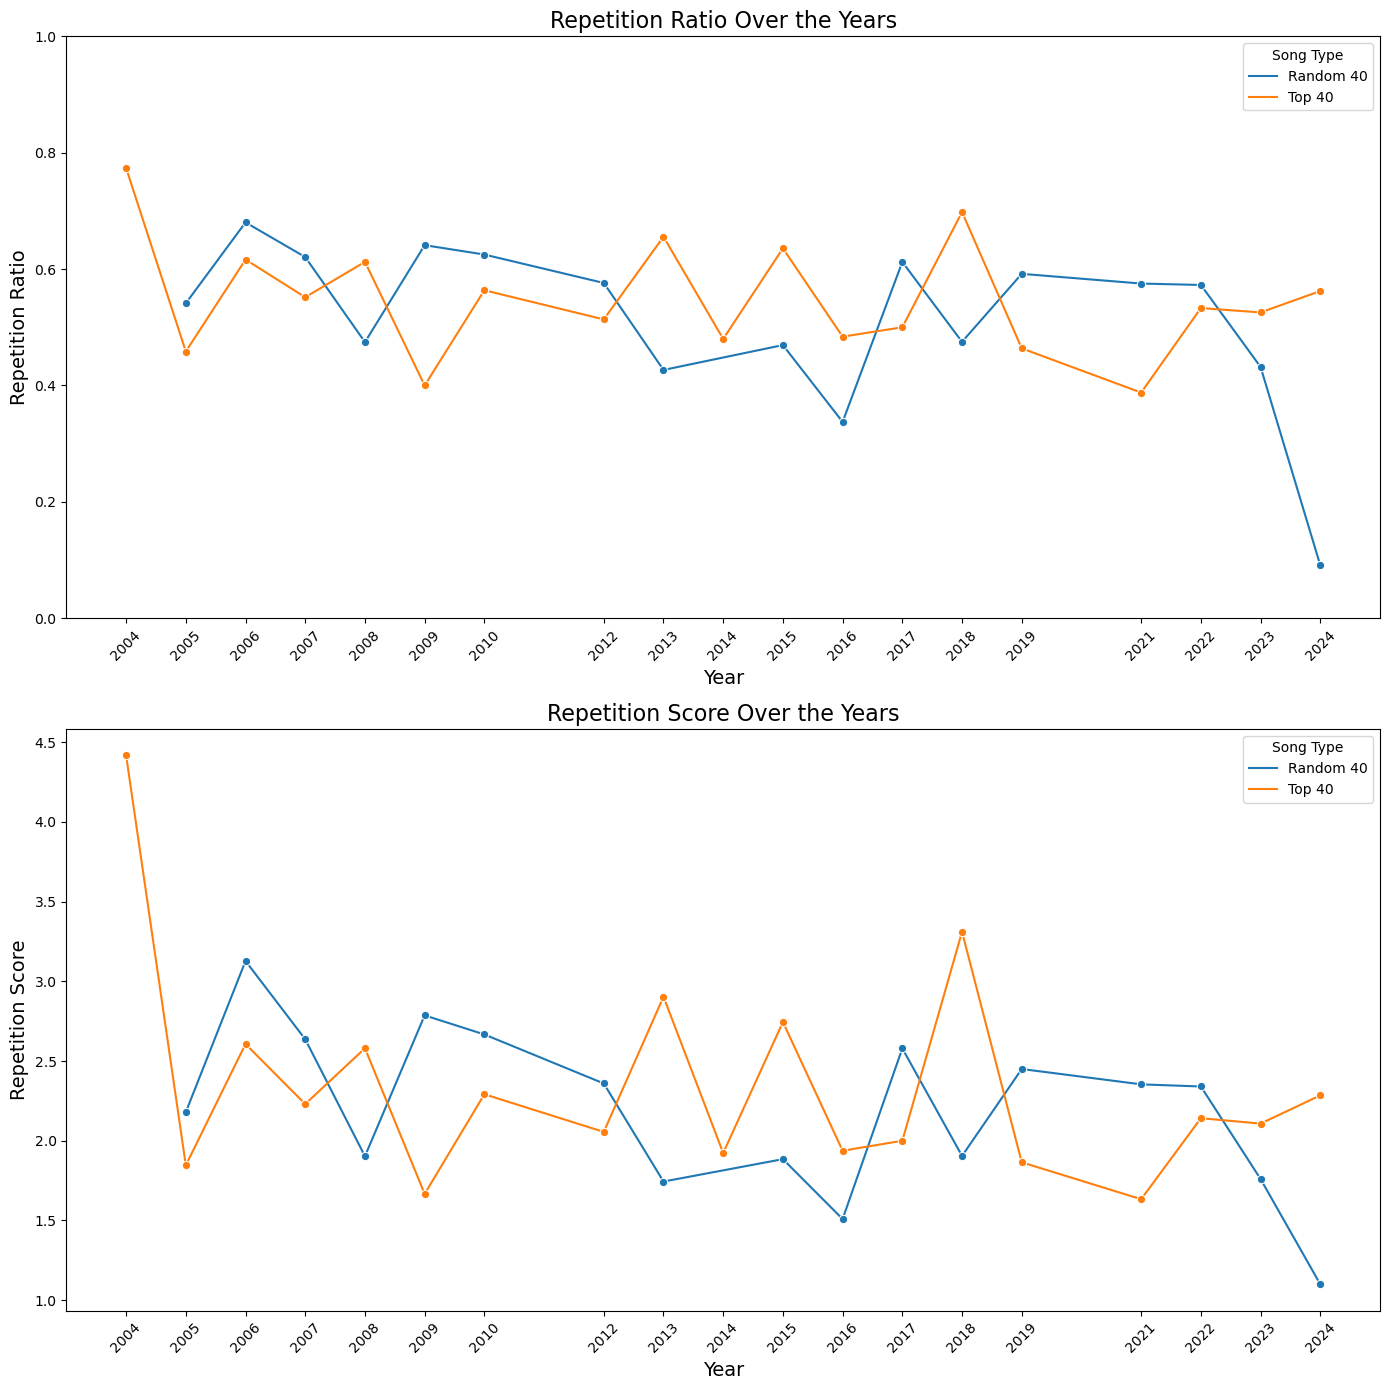

In [24]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data
nltk.download('punkt')

# Function to calculate repetitiveness statistics for the combined text
def calculate_repetitiveness(text):
    # Tokenize the text and convert to lowercase
    words = nltk.word_tokenize(text.lower())
    
    # Calculate the total number of words
    total_words = len(words)
    
    if total_words == 0:
        return {
            'total_words': 0,
            'unique_word_count': 0,
            'repetition_ratio': np.nan,
            'unique_word_ratio': np.nan,
            'repetition_score': np.nan
        }
    
    # Calculate the number of unique words
    unique_words = set(words)
    unique_word_count = len(unique_words)
    
    # Calculate the word frequencies
    word_counts = Counter(words)
    
    # Calculate the repetition ratio
    repetition_ratio = (total_words - unique_word_count) / total_words
    
    # Calculate the unique word ratio
    unique_word_ratio = unique_word_count / total_words

    # Calculate the repetition score
    repetition_score = total_words / unique_word_count
    
    return {
        'total_words': total_words,
        'unique_word_count': unique_word_count,
        'repetition_ratio': repetition_ratio,
        'unique_word_ratio': unique_word_ratio,
        'repetition_score': repetition_score
    }

# Exclude years 2011 and 2020 from both dataframes
limited_df_excluded = limited_df[~limited_df['Year'].isin([2011, 2020])]
limited_df_1_excluded = limited_df_1[~limited_df_1['Year'].isin([2011, 2020])]

# Initialize lists to store statistics
random_repetitiveness_stats = []
top40_repetitiveness_stats = []

# Define the range of years
years = np.arange(2004, 2025)
years = years[~np.isin(years, [2011, 2020])]

# Calculate statistics for each year
for year in years:
    # Random songs
    lyrics_random = " ".join(limited_df_excluded[limited_df_excluded['Year'] == year]['prep_lyric'])
    stats_random = calculate_repetitiveness(lyrics_random)
    stats_random['year'] = year
    stats_random['type'] = 'Random 40'
    random_repetitiveness_stats.append(stats_random)
    
    # Top 40 songs
    lyrics_top = " ".join(limited_df_1_excluded[limited_df_1_excluded['Year'] == year]['prep_lyric'])
    stats_top = calculate_repetitiveness(lyrics_top)
    stats_top['year'] = year
    stats_top['type'] = 'Top 40'
    top40_repetitiveness_stats.append(stats_top)

# Combine the statistics into a single DataFrame
repetitiveness_stats = random_repetitiveness_stats + top40_repetitiveness_stats
repetitiveness_df = pd.DataFrame(repetitiveness_stats)

# Ensure that all years are represented in the DataFrame
all_years = pd.DataFrame({
    'year': np.repeat(years, 2),
    'type': ['Random 40', 'Top 40'] * len(years)
})

repetitiveness_df = pd.merge(all_years, repetitiveness_df, on=['year', 'type'], how='left')

# Sort the DataFrame by year and type
repetitiveness_df = repetitiveness_df.sort_values(by=['year', 'type'])
repetitiveness_df['year'] = repetitiveness_df['year'].astype(int)

# Visualize the repetitiveness statistics over the years
plt.figure(figsize=(14, 14))

# Plot Repetition Ratio
plt.subplot(2, 1, 1)
sns.lineplot(x='year', y='repetition_ratio', hue='type', data=repetitiveness_df, marker='o')
plt.title('Repetition Ratio Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Repetition Ratio', fontsize=14)
plt.ylim(0, 1)
plt.xticks(years, rotation=45)
plt.legend(title='Song Type')

# Plot Repetition Score
plt.subplot(2, 1, 2)
sns.lineplot(x='year', y='repetition_score', hue='type', data=repetitiveness_df, marker='o')
plt.title('Repetition Score Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Repetition Score', fontsize=14)
plt.xticks(years, rotation=45)
plt.legend(title='Song Type')

plt.tight_layout()
plt.show()


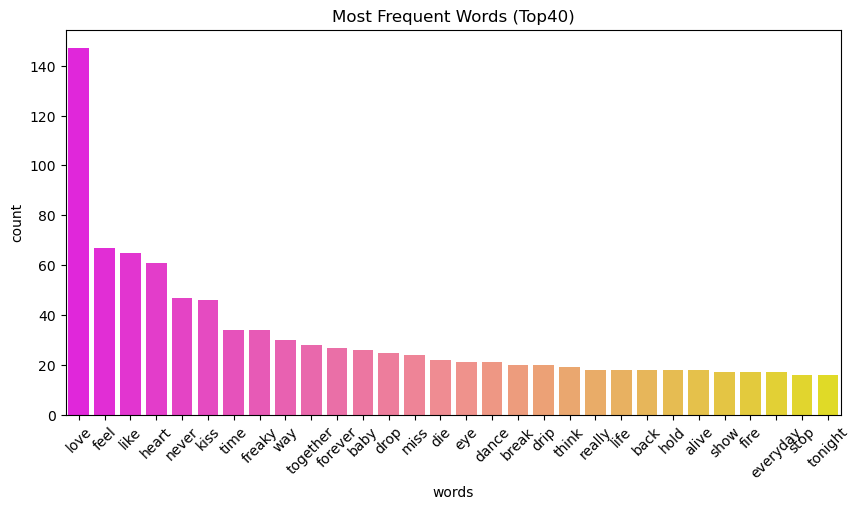

In [26]:
# Import Counter 
from collections import Counter

# Join all word corpus
review_words = ','.join(list(limited_df['prep_lyric'].values))

# Count and find the 30 most frequent
counter = Counter(review_words.split())
most_frequent = counter.most_common(30)

# Bar plot of frequent words
fig = plt.figure(1, figsize = (10,5))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'spring')
plt.title("Most Frequent Words (Top40)");
plt.xticks(rotation=45);

# Topic Modelling



In [27]:
# TF-IDF Vectorizer for lyric data
vectorizer = TfidfVectorizer(stop_words = stop, min_df=0.1 ,max_df=0.20)
tfifd = vectorizer.fit_transform(limited_df['prep_lyric'])

# Define Search Param
search_params = {'n_components': range(5,15), 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5 ,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(tfifd)

GridSearchCV(estimator=LatentDirichletAllocation(max_iter=5, random_state=0),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': range(5, 15)})

In [28]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 5}


In [29]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(tfifd)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(limited_df))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic["dominant_topic"] = dominant_topic
# distribution of topics
df_document_topic.dominant_topic.value_counts()

3    11
0    10
1     7
4     7
2     5
Name: dominant_topic, dtype: int64

In [30]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,little,miss,still,need,really,kiss,world,lose,find,good,walk,fire,reach,touch,last
Topic 1,stop,hope,girl,light,right,hand,song,fire,faith,touch,inside,lie,tear,move,world
Topic 2,try,win,last,show,happen,nothing,burn,hold,lose,another,real,tonight,baby,walk,lie
Topic 3,dance,life,live,beat,night,close,clear,girl,baby,head,dream,wind,free,nothing,keep
Topic 4,forever,together,hurt,baby,open,hold,another,walk,inside,though,fly,word,verse,fear,show


## Appropriate names for the topics found in the LDA result
* Topic 0: "Relationship Games"
* Topic 1: "Emotional Struggle"
* Topic 2: "Personal Growth"
* Topic 3: "Unity and Desire"
* Topic 4: "Energy and Empowerment"

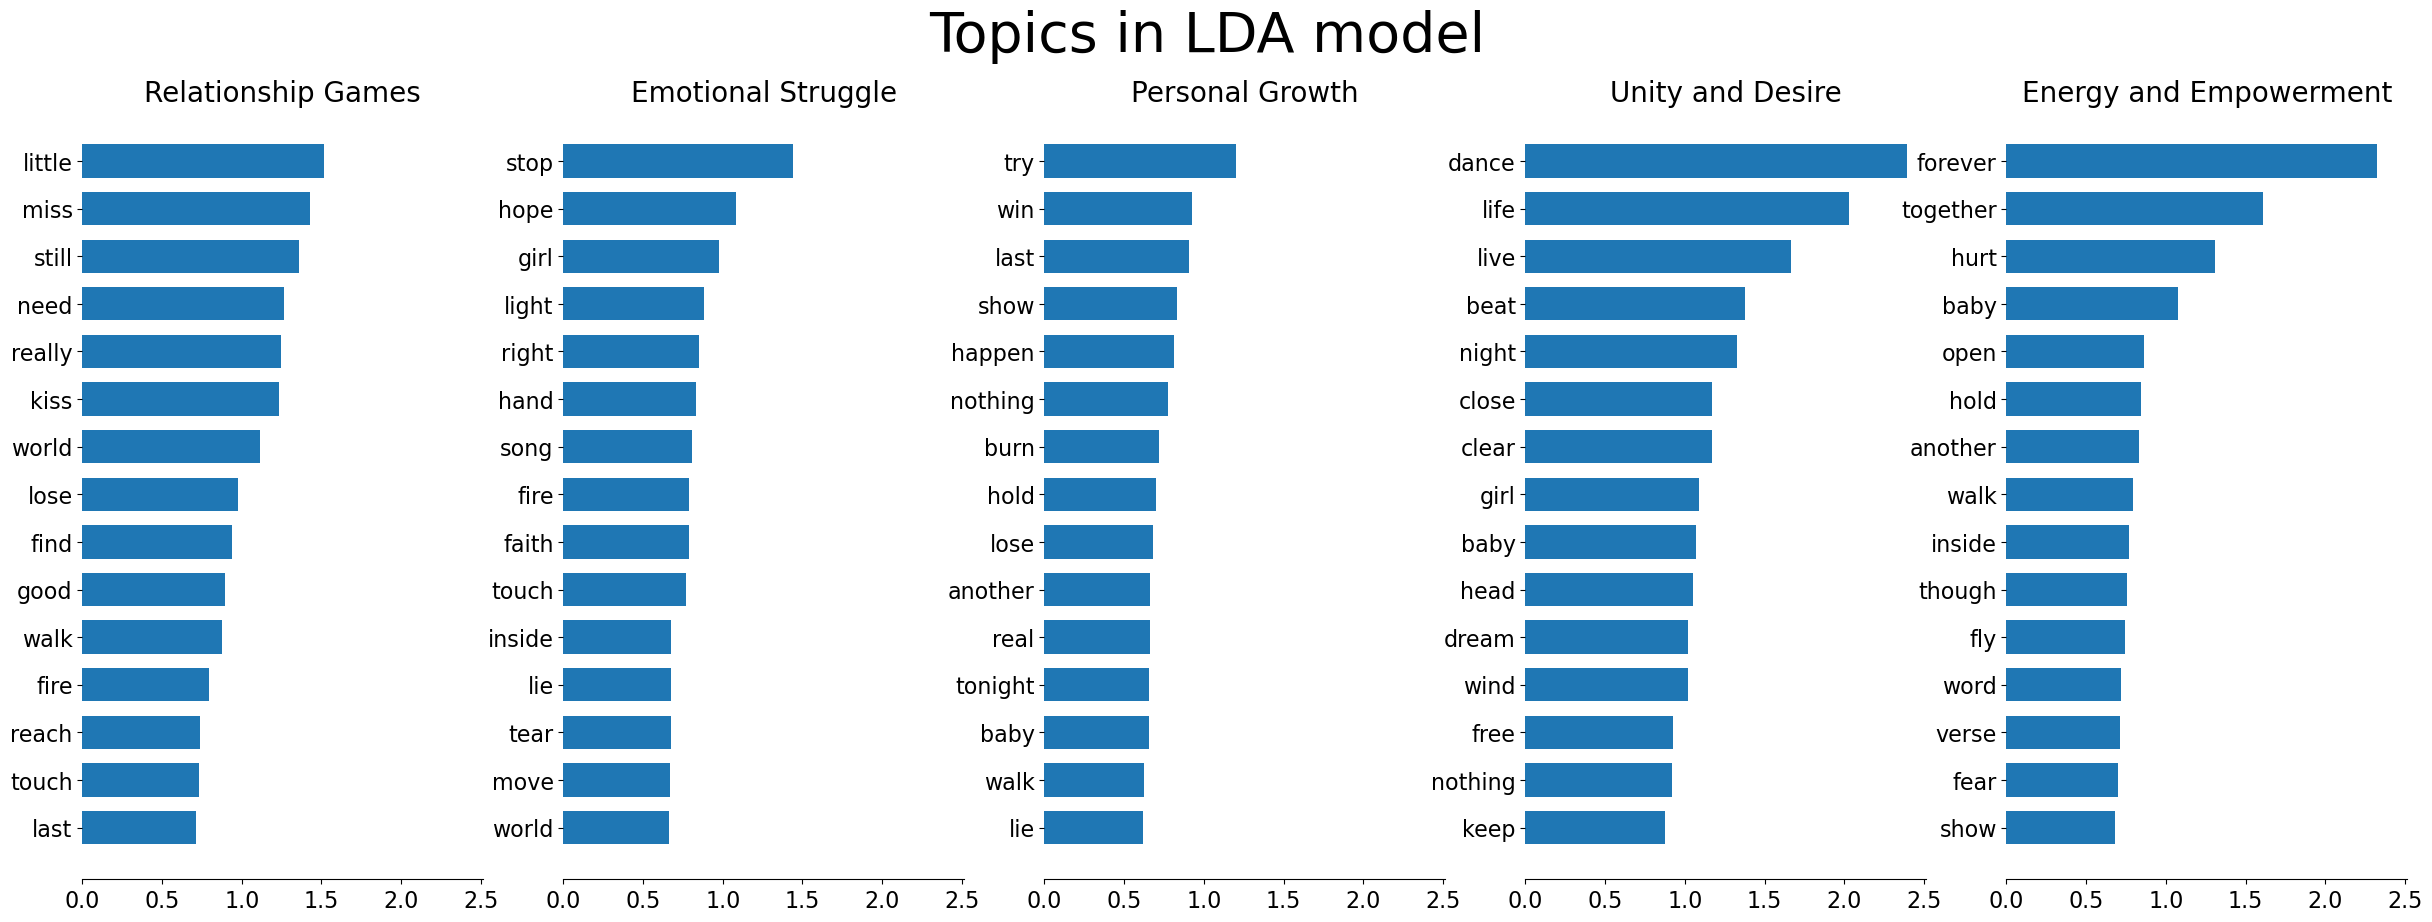

In [31]:
# Define a function for plotting the distribution of most frequent words for topics
def plot_top_words(model, feature_names, n_top_words, title): 
    # Create a figure with 1 row and 5 columns, with shared x-axis
    fig, axes = plt.subplots(1, 5, figsize=(30, 10), sharex=True)
    axes = axes.flatten()

    # Define the names of the topics
    topic_names = ["Relationship Games", "Emotional Struggle", "Personal Growth", "Unity and Desire", "Energy and Empowerment"]
    
    # Iterate over each topic in the model
    for topic_idx, topic in enumerate(model.components_):
        # Get the indices of the top n_top_words features in the topic
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        # Get the actual feature names using the indices
        top_features = [feature_names[i] for i in top_features_ind]
        # Get the weights of the top features in the topic
        weights = topic[top_features_ind]

        # Get the corresponding axis for the current topic
        ax = axes[topic_idx]
        # Create a horizontal bar plot of the top features and their weights
        ax.barh(top_features, weights, height=0.7)
        # Set the title of the subplot to the name of the topic
        ax.set_title(topic_names[topic_idx], fontdict={"fontsize": 20})
        # Invert the y-axis to show the most important words on top
        ax.invert_yaxis()
        # Set the tick label font size for both axes
        ax.tick_params(axis="both", which="major", labelsize=16)
        # Hide the spines (borders) on the top, right, and left sides of the subplot
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        # Set the overall title of the figure
        fig.suptitle(title, fontsize=40)

    # Display the plot
    plt.show()

# Get the feature names from the vectorizer
tf_feature_names = vectorizer.get_feature_names_out()
# Call the function to plot the top words for each topic in the best LDA model
plot_top_words(best_lda_model, tf_feature_names, 15, "Topics in LDA model")


# Post-Processing Data

In [32]:
df_document_topic = df_document_topic.reset_index(drop=True)
df_document_topic.head(5)

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
0,0.05,0.81,0.05,0.05,0.05,1
1,0.05,0.05,0.05,0.82,0.04,3
2,0.06,0.06,0.06,0.07,0.75,4
3,0.05,0.05,0.05,0.80,0.05,3
4,0.78,0.05,0.06,0.06,0.05,0


In [33]:
# change columns names with our column names
df_document_topic.columns = ["Relationship_Games", "Emotional_Struggle", "Personal_Growth", "Unity_and_Desire", "Energy_and_Empowerment", "dominant_topic"]

df_document_topic.dominant_topic = np.where(df_document_topic.dominant_topic == 0, "Relationship Games",
         np.where(df_document_topic.dominant_topic == 1, "Emotional Struggle",
                  np.where(df_document_topic.dominant_topic == 2, "Personal Growth",
                           np.where(df_document_topic.dominant_topic == 3, "Unity and Desire",
                                    np.where(df_document_topic.dominant_topic == 4, "Energy and Empowerment", np.nan)))))

In [34]:
# concat main dataframe with topic dataframe
# Reset index of limited_df
limited_df.reset_index(drop=True, inplace=True)

# Reset index of df_document_topic
#df_document_topic.reset_index(drop=True, inplace=True)

# Concatenate limited_df and df_document_topic along the columns axis
result_df = pd.concat([limited_df, df_document_topic], axis=1)


In [35]:
# Select necessary features
result_df = result_df[["Country","Artist","Song","Language","Pl.","Year","Lyrics translation","prep_lyric","Relationship_Games", "Emotional_Struggle", "Personal_Growth", "Unity_and_Desire", "Energy_and_Empowerment", "dominant_topic"]]

In [36]:
# Filtering the rows in result_df based on specific conditions
changed_df = result_df[
    (result_df["Relationship_Games"] < 0.4) &
    (result_df["Emotional_Struggle"] < 0.4) &
    (result_df["Personal_Growth"] < 0.4) &
    (result_df["Unity_and_Desire"] < 0.4) &
    (result_df["Energy_and_Empowerment"] < 0.4)
]

# Resetting the index of changed_df
changed_df = changed_df.reset_index()

# Initializing empty lists to store the dominant topic values
main_list1 = []
main_list2 = []

# List of topic names
topic_list = ["Relationship_Games", "Emotional_Struggle", "Personal_Growth", "Unity_and_Desire", "Energy_and_Empowerment"]

# Iterating over the rows of changed_df
for row, index in changed_df.iterrows():
    # Creating a temporary list of topic values
    temp_list = [index["Relationship_Games"], index["Emotional_Struggle"], index["Personal_Growth"], index["Unity_and_Desire"], index["Energy_and_Empowerment"]]
    # Creating a copy of the temporary list and sorting it
    temp_list2 = temp_list.copy()
    temp_list2.sort()
    # Appending the dominant topic names to main_list1 and main_list2
    main_list1.append(topic_list[temp_list.index(temp_list2[-1])])
    main_list2.append(topic_list[temp_list.index(temp_list2[-2])])

# Adding the dominant topic columns to changed_df
changed_df["large_1"] = main_list1
changed_df["large_2"] = main_list2

# Creating the dominant_topic column by combining large_1 and large_2
#changed_df["dominant_topic"] = changed_df["large_1"] + "-" + changed_df["large_2"]
changed_df["dominant_topic"] = changed_df["large_1"].astype(str) + "-" + changed_df["large_2"].astype(str)


# Dropping the intermediate columns (large_1 and large_2)
changed_df.drop(["large_1", "large_2"], axis=1, inplace=True)

# Setting the index of changed_df back to "index" column
changed_df.set_index(keys="index", inplace=True)

# Dropping the rows in result_df that are present in changed_df
result_df.drop(changed_df.index, axis=0, inplace=True)

# Concatenating changed_df with result_df and sorting the index
result_df = pd.concat([result_df, changed_df], axis=0)
result_df = result_df.sort_index()

In [37]:
# Assigning "Mix" to the "dominant_topic" column for rows that meet the specified conditions
result_df.loc[(result_df["Relationship_Games"] == 0.2) & 
                (result_df["Emotional_Struggle"] ==0.2) & 
                (result_df["Personal_Growth"] == 0.2) & 
                (result_df["Unity_and_Desire"] == 0.2) & 
                (result_df["Energy_and_Empowerment"] == 0.2), "dominant_topic"] = "Mix"

In [38]:
result_df.dominant_topic.value_counts()

Unity and Desire          11
Relationship Games         9
Emotional Struggle         7
Energy and Empowerment     7
Personal Growth            5
Mix                        1
Name: dominant_topic, dtype: int64

# Sentiment Analysis

Sentiment analysis is a method for understanding and classifying emotional content in data types such as text, audio, or images. Sentiment analysis uses linguistic and statistical methods to determine the emotional state expressed by a text or a user.

Sentiment analysis aims to identify the emotional tone, emotional reactions or emotional states of users in texts. It is often used to describe the three basic categories of emotions, positive, negative, and neutral.

In [39]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer  # Import the SentimentIntensityAnalyzer class from NLTK

# Initializing the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Convert NaN values to empty strings in the 'prep_lyric' column
result_df['prep_lyric'] = result_df['prep_lyric'].fillna('')

# Applying sentiment analysis on the 'prep_lyric' column and adding the results as new columns in the DataFrame
result_df['polarity'] = result_df['prep_lyric'].apply(lambda x: analyzer.polarity_scores(str(x)))
result_df = pd.concat(
    [result_df.drop(['polarity'], axis=1),
     result_df['polarity'].apply(pd.Series)], axis=1)

# Mapping the compound score to sentiment labels ('positive', 'neutral', 'negative')
result_df['sentiment'] = result_df['compound'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x == 0 else 'negative')

# Dropping the intermediate sentiment analysis columns from the DataFrame
result_df.drop(["neg", "neu", "pos", "compound"], axis=1, inplace=True)


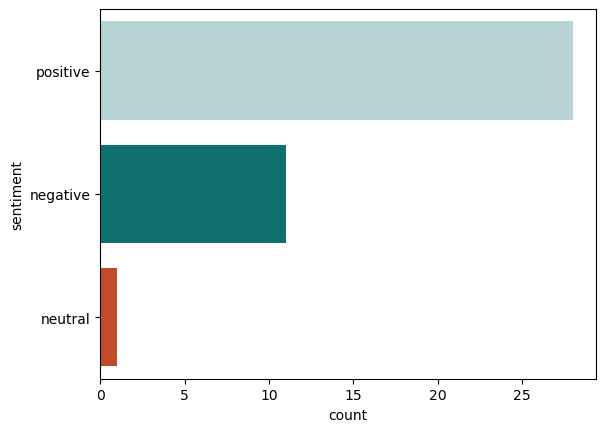

In [40]:
# Number of tweets 
sns.countplot(y='sentiment', 
             data=result_df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

# Visualization

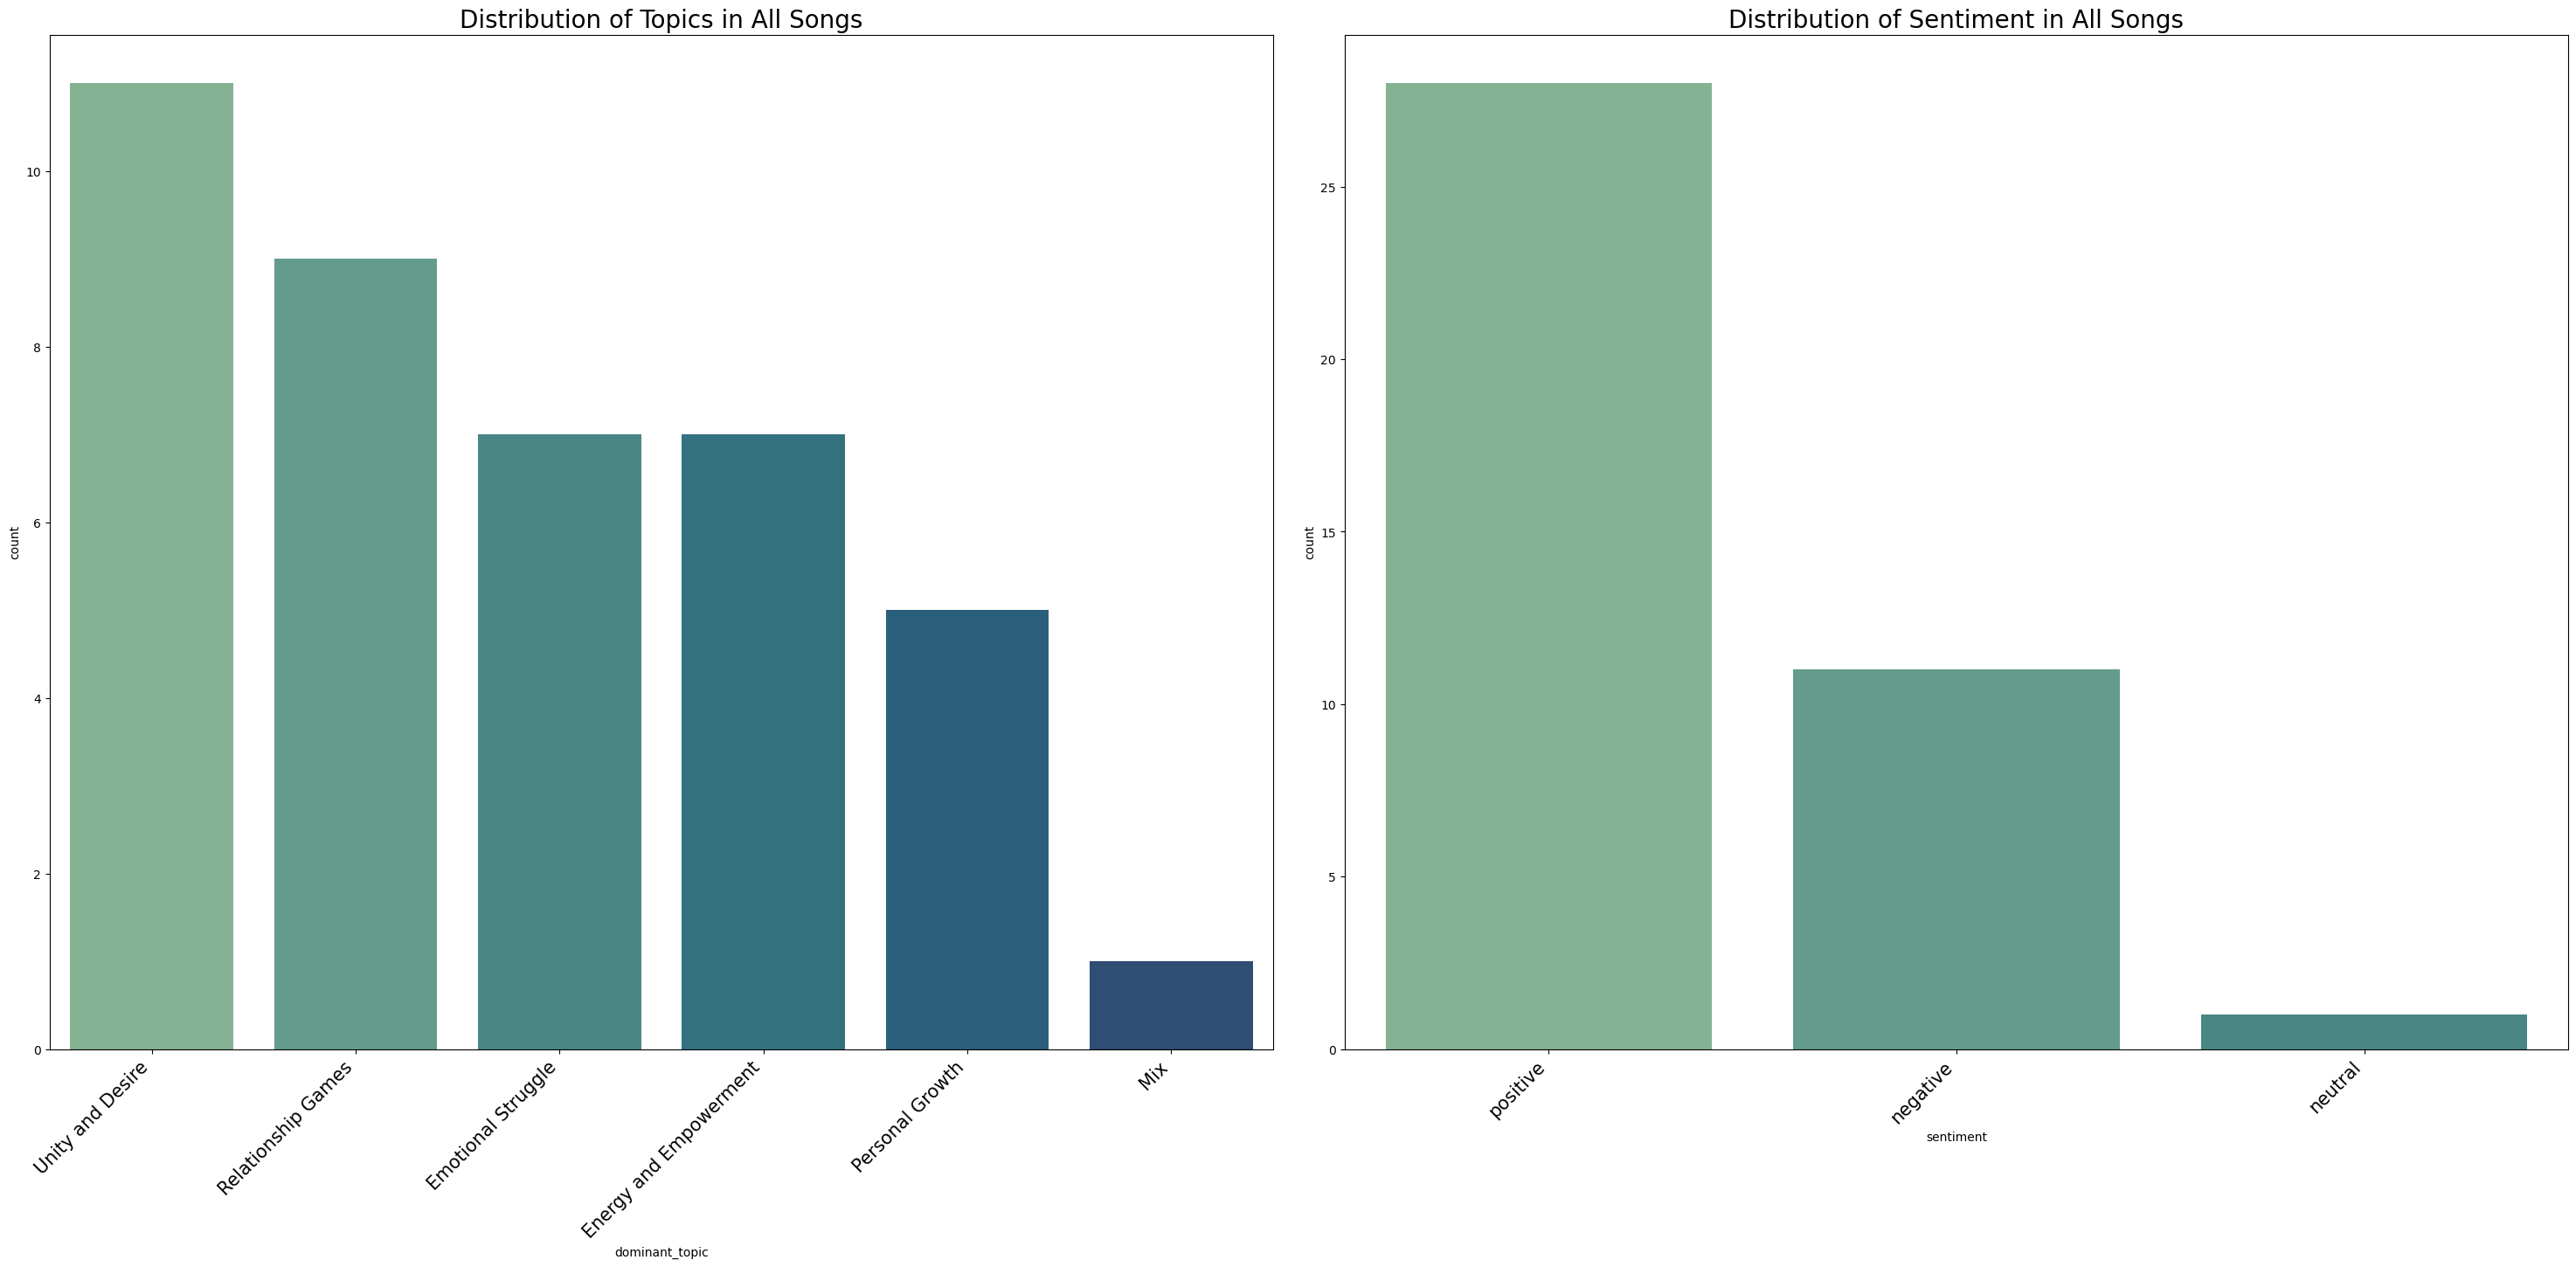

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with NaN values in the dominant_topic column
result_df = result_df.dropna(subset=['dominant_topic'])

# Initialize the figure and axes (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(30, 15))
sns.set_palette("crest")  

# Distribution of Topics in All Songs
sns.countplot(ax=axes[0], x=result_df["dominant_topic"], order=result_df["dominant_topic"].value_counts().index)
axes[0].set_title("Distribution of Topics in All Songs", fontdict={"fontsize": 20})
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right", fontdict={"fontsize": 15})

# Distribution of Sentiment in All Songs
sns.countplot(ax=axes[1], x=result_df["sentiment"], order=result_df["sentiment"].value_counts().index)
axes[1].set_title("Distribution of Sentiment in All Songs", fontdict={"fontsize": 20})
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right", fontdict={"fontsize": 15})

# Adjust spacing between subplots
plt.tight_layout(pad=2.5)

# Display the plots
plt.show()


The graphs above were examined first in general and then according to the last 10 years.

1. In the first two charts, the winning and losing songs were analyzed according to their topics. First of all, when we look at the winning songs, the most winning topic is Struggles and Determination, followed by Joyful Rhythms and Togethernes. Moving On and Letting Go is the theme that lost the most in recording songs, followed by Emotional Connections. Based on these two observations, songs with very emotional and separation-style themes are more likely to lose than others. Secondly, when the graph of the lost songs was examined, it was observed that the songs contained more than one topic. It indicates that the topic of this song is mixed and that songs with two or more such topics are lost. The conclusion to be drawn from this is that the songs should be focused on a certain topic in order to be understandable and influencing the person.

2. When the songs are analyzed according to emotion, we can see that the weight of positive songs is high both in general and for the last 10 years. The thing to note here is that songs that can be described as neutral are more likely to lose.

3. The themes of the songs in the last 10 years are also examined as they are close to the present. Here, when both the winning and losing songs are examined, the most frequently mentioned subject is Struggles and Determination. Therefore, it may be more risky to use this subject in new songs. It can be continued with the topic Joyful Rhythms and Togetherness.

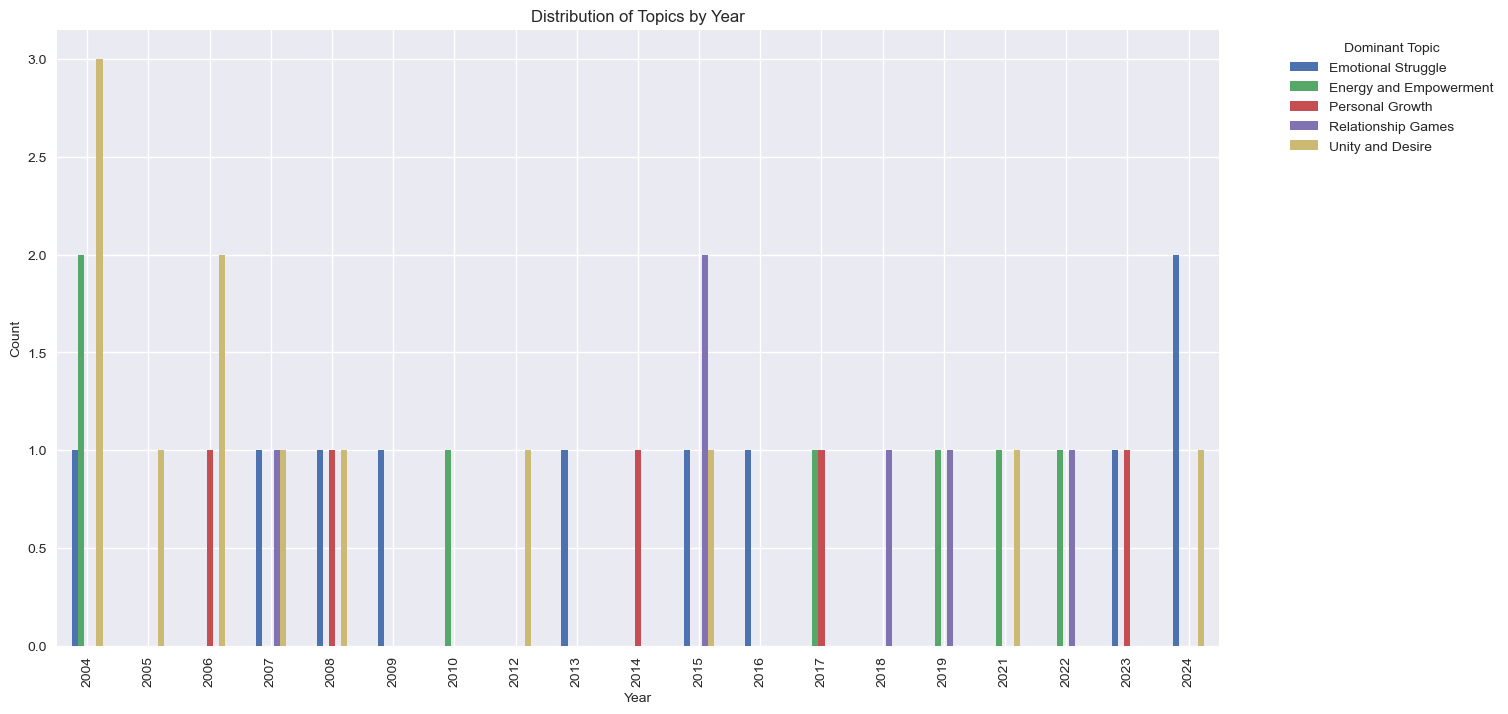

In [32]:
import matplotlib.pyplot as plt

# Assuming result_df is already defined and contains the relevant data

# Step 1: Group the data by year and dominant topic
grouped_data = result_df.groupby(['Year', 'dominant_topic']).size().unstack()

# Step 2: Plot the bar chart
plt.style.use('seaborn')

grouped_data.plot(kind='bar', stacked=False, figsize=(15, 8))

# Set the plot title and labels
plt.title('Distribution of Topics by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Display the legend
plt.legend(title='Dominant Topic', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()